In [19]:
#setwd('~/exercise/TimeSeries/PracticeTs/')
milk<-read.csv('./dataset/monthly-milk-production-pounds.csv')
Milk<-ts(milk$Pounds)

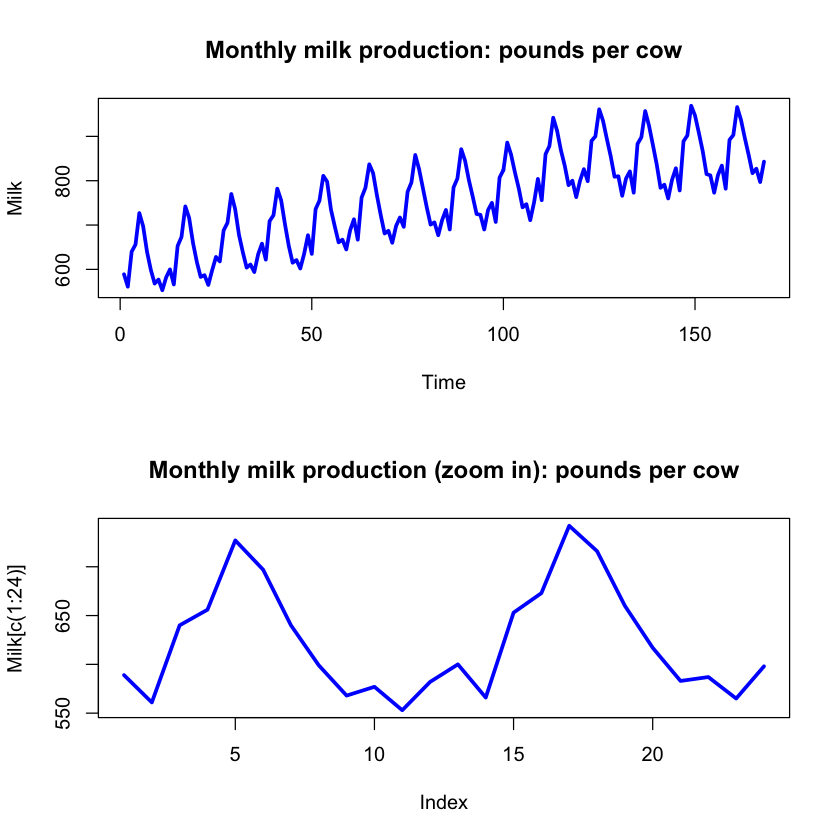

In [27]:
par(mfcol=c(2, 1))
plot(Milk, main="Monthly milk production: pounds per cow", lwd=3, col='blue')
plot(Milk[c(1:24)], main="Monthly milk production (zoom in): pounds per cow", lwd=3, col='blue', type='l')

### Time Series Analysis  
1. Time plot
2. Transformation
3. Differencing (seasonal or non-seasonal)
4. ACF -> Adjacent spikes -> MA order
5. ACF -> Spikes around seasonal lags -> SMA order
6. PACF -> Adjacent spikes -> AR order
7. PACF -> Spikes around seasonal lags -> SAR order
8. Fit few different model
9. Compare AIC, choose a model with minimum AIC
10. The parsimony principle
11. Time plot, ACF and PACF of residuals
12. Ljung-Box test for residuals

1. 趋势明显，d=1

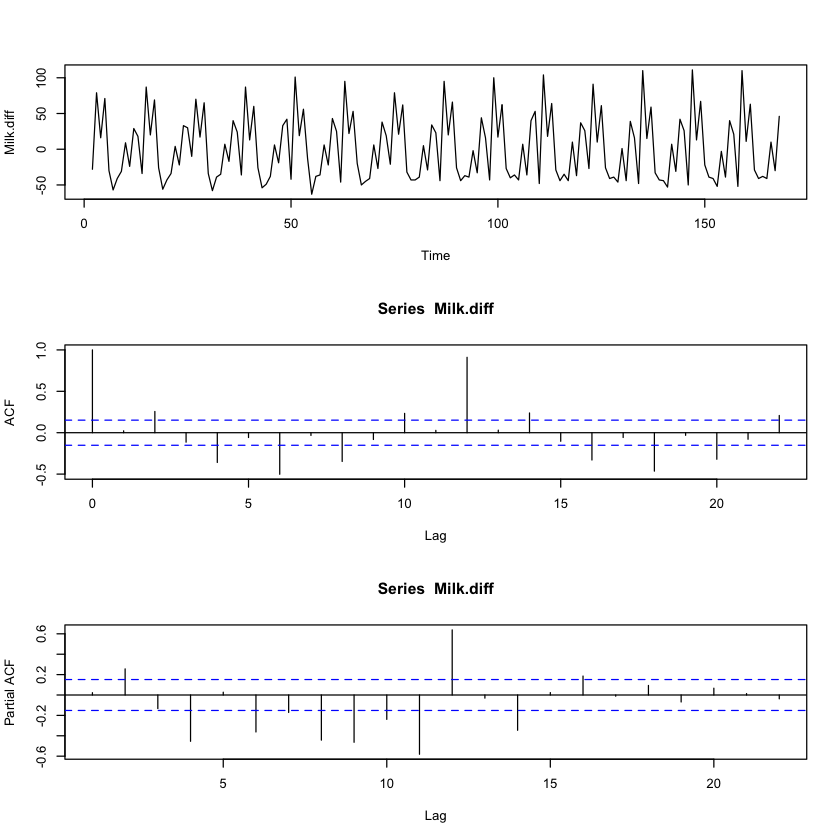

In [33]:
Milk.diff = diff(Milk)
par(mfcol=c(3,1))
plot(Milk.diff)
acf(Milk.diff)
pacf(Milk.diff)

2. ACF呈现明显周期，预示有seasonal, D=1/m=12
3. p=0/1/2/3, q = 0/1, 

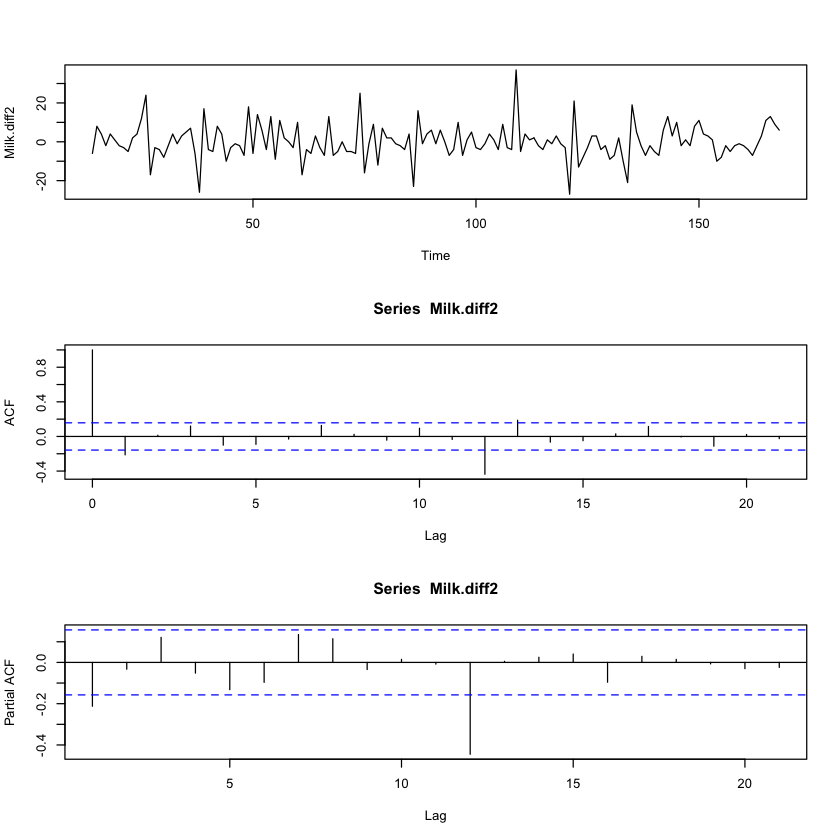

In [36]:
Milk.diff2 = diff(Milk.diff, 12)
par(mfrow=c(3,1))
plot(Milk.diff2)
acf(Milk.diff2)
pacf(Milk.diff2)

4. P=1, Q=1，2
5. Note: 图形中可能存在outlier

In [39]:
Box.test(Milk, lag=log(length(Milk)))


	Box-Pierce test

data:  Milk
X-squared = 370.5, df = 5.124, p-value < 2.2e-16


6. 拒绝假设，即无自相关性

In [44]:
library(astsa)
library(forecast)

d=NULL
DD=NULL
d=1
DD=1

per=12
for(p in 1:4){
  for(q in 1:2){
    for(i in 1:2){
      for(j in 1:3){
        if(p+d+q+i+DD+j<=10){
          model<-arima(x=Milk, order = c((p-1),d,(q-1)), seasonal = list(order=c((i-1),DD,(j-1)), period=per))
          pval<-Box.test(model$residuals, lag=log(length(model$residuals)))
          sse<-sum(model$residuals^2)
          cat(p-1,d,q-1,i-1,DD,j-1,per, 'AIC=', model$aic, ' SSE=',sse,' p-VALUE=', pval$p.value,'\n')
        }
      }
    }
  }
}

0 1 0 0 1 0 12 AIC= 1119.969  SSE= 12315.74  p-VALUE= 0.02571055 
0 1 0 0 1 1 12 AIC= 1072.284  SSE= 8622.066  p-VALUE= 0.02663603 
0 1 0 0 1 2 12 AIC= 1074.091  SSE= 8604.425  p-VALUE= 0.02484041 
0 1 0 1 1 0 12 AIC= 1089.116  SSE= 9804.661  p-VALUE= 0.01144098 
0 1 0 1 1 1 12 AIC= 1074.136  SSE= 8608.948  p-VALUE= 0.02510353 
0 1 0 1 1 2 12 AIC= 1074.986  SSE= 8353.856  p-VALUE= 0.02854724 
0 1 1 0 1 0 12 AIC= 1114.994  SSE= 11770.79  p-VALUE= 0.305922 
0 1 1 0 1 1 12 AIC= 1066.301  SSE= 8173.711  p-VALUE= 0.5740857 
0 1 1 0 1 2 12 AIC= 1067.981  SSE= 8149.271  p-VALUE= 0.5870468 
0 1 1 1 1 0 12 AIC= 1082.128  SSE= 9232.689  p-VALUE= 0.4726065 
0 1 1 1 1 1 12 AIC= 1068.034  SSE= 8153.955  p-VALUE= 0.5845583 
0 1 1 1 1 2 12 AIC= 1069.375  SSE= 8083.671  p-VALUE= 0.5630751 
1 1 0 0 1 0 12 AIC= 1114.844  SSE= 11759.19  p-VALUE= 0.2592803 
1 1 0 0 1 1 12 AIC= 1066.211  SSE= 8171.937  p-VALUE= 0.5683381 
1 1 0 0 1 2 12 AIC= 1067.861  SSE= 8145.603  p-VALUE= 0.5940696 
1 1 0 1 1 0 12 AIC= 

7. 最小AIC   

0 1 1 0 1 1 12 AIC= 1066.301  SSE= 8173.711  p-VALUE= 0.5740857   

__p_value 显示，残差无自相关性__


In [41]:
model<- arima(x=Milk, order = c(0,1,1), seasonal = list(order=c(0,1,1), period=12))

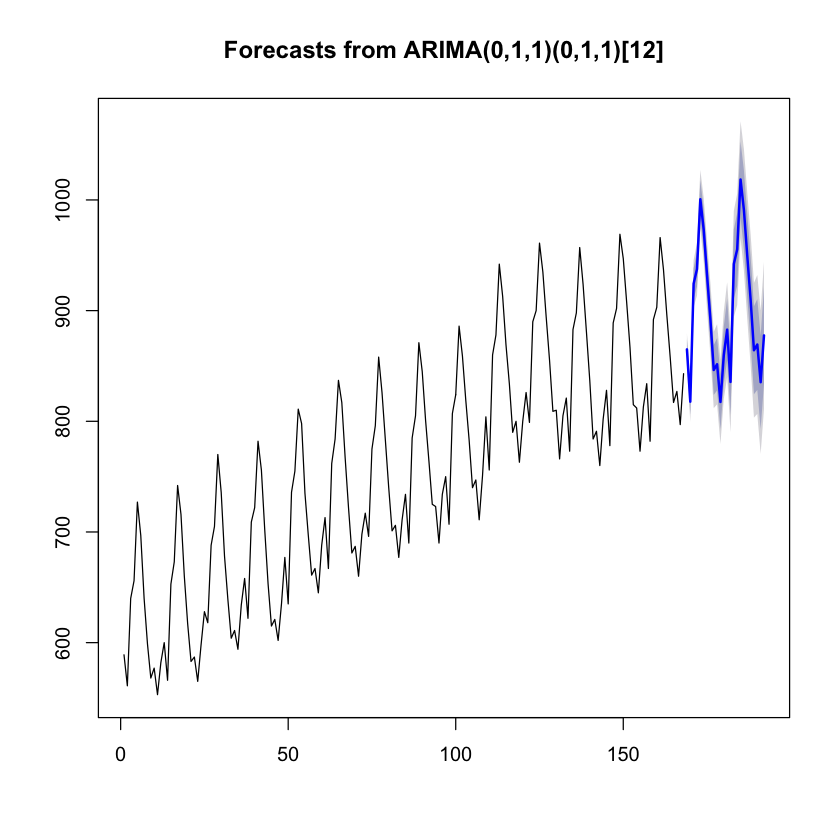

In [42]:
plot(forecast(model))